## Clustering Problem
#### We want to find out the type of natural cluster that exists among the top movies. Unsupervised machine learning techniques will be employed, more specifically, clustering algorithms
##### K-Means has been used to cluster overview

In [93]:
# Import modules
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english')) #stopwords will be used to filter out meaningless words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chunw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chunw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Introducing 2 concepts: Stemming and Tokenisation
#### in essence, it helps to reduce the word input into the root word AND breaks down the sentences and words for storing

In [94]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):

    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]

    return stems

words_stemmed = tokenize_and_stem("You're a wizard, Harry.")
print(words_stemmed) #just to show an example of how this func works

['you', 're', 'a', 'wizard', 'harri']


#### we must convert our textual plot summaries to numbers for the computer to be able to extract meaning from them. One simple method of doing this would be to count all the occurrences of each word in the entire vocabulary and return the counts in a vector. "CountVectorizer"

#### we pair this with Term Frequency-Inverse Document Frequency (TF-IDF) to accounts for the frequency of the word in this sentence, but reduces the importance of the word if it frequently appears in other documents

In [95]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

#taking first 250 datasets
df_test=movieData.iloc[:100]
df_test

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stopwords.words('english'),
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

# Fit and transform the tfidf_vectorizer with the "overview" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix =  tfidf_vectorizer.fit_transform([str(x) for x in df_test["overview"]])

print(tfidf_matrix.shape)
print(tfidf_matrix)

(100, 2)
  (1, 1)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (9, 1)	1.0
  (13, 0)	1.0
  (15, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (30, 1)	1.0
  (33, 0)	1.0
  (36, 0)	1.0
  (42, 1)	1.0
  (43, 0)	1.0
  (44, 0)	1.0
  (46, 1)	1.0
  (48, 0)	0.6893851274590753
  (48, 1)	0.7243950207160693
  (49, 0)	0.6893851274590753
  (49, 1)	0.7243950207160693
  (50, 1)	1.0
  (54, 0)	0.6893851274590753
  (54, 1)	0.7243950207160693
  (55, 0)	1.0
  (56, 0)	1.0
  (60, 0)	1.0
  (61, 0)	1.0
  (63, 1)	1.0
  (71, 1)	1.0
  (72, 1)	1.0
  (74, 0)	0.8852549984590379
  (74, 1)	0.4651059962022515
  (75, 0)	1.0
  (77, 1)	1.0
  (79, 0)	1.0
  (80, 0)	1.0
  (82, 1)	1.0
  (83, 0)	1.0
  (85, 1)	1.0
  (86, 1)	1.0
  (89, 1)	1.0
  (91, 0)	0.6893851274590753
  (91, 1)	0.7243950207160693
  (92, 0)	1.0
  (93, 1)	1.0
  (95, 0)	1.0
  (98, 0)	1.0


C:\Users\chunw\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


#### once we have fitted our model, we need to create clusters, but how many? We plot a graph of Cluster Sum of Squares against Clusters, note that as number of clusters increase, the CSS will definitely fall until we have CSS=0 and no of clusters=no of variables

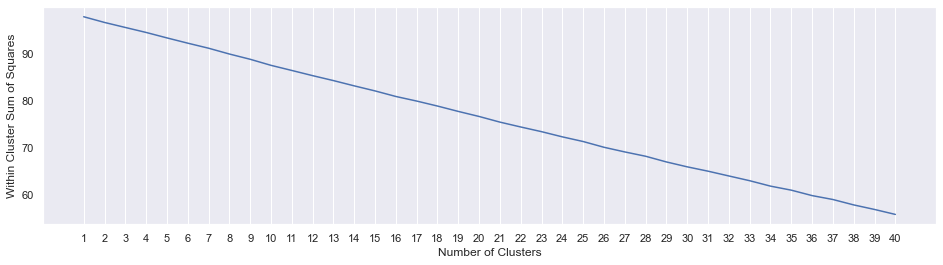

In [96]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in df_test['overview']])
#returns a list of words.
words = tfv.get_feature_names()

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(vec_text)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

no convincing elbow point hence, we try our luck and find that 5 works pretty well

In [97]:
#try another way
#clustering the top 250 movies from popular
df_test #test data of 250 movies
#cluster them and find the best number of clusters
#find the avg revenue of each cluster (check distribution of revenue across clusters)
#find the cluster with the highest revenue 

#test to see if can find top terms of cluster
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer


#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(tokenize_and_stem(str(x))) for x in df_test['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 5, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : aveng, follow, battl, power, becom, earth, event, univers, peter, caus
1 : young, forc, crime, past, escap, hit, join, woman, assassin, face
2 : harri, learn, year, turn, black, hogwart, find, ancient, new, live
3 : danger, time, team, make, island, race, research, frieza, adult, explor
4 : life, take, get, world, new, deadpool, evil, power, forc, train


C:\Users\chunw\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [98]:
clusters = kmeans.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
df_test["Cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
df_test['Cluster'].value_counts()


<ipython-input-98-1bd6b868f6dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Cluster"] = clusters


0    24
3    20
4    20
1    18
2    18
Name: Cluster, dtype: int64

<ipython-input-99-ae9a2b7dc963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['BoxOffice'] = df_test['BoxOffice'].astype(int)
<ipython-input-99-ae9a2b7dc963>:3: RuntimeWarning: overflow encountered in long_scalars
  avg_pop=sum(df_test["BoxOffice"].values)/len(df_test["BoxOffice"].values)
<ipython-input-99-ae9a2b7dc963>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["above_avg"]=(df_test["BoxOffice"]-avg_pop>0)
<ipython-input-99-ae9a2b7dc963>:8: SettingWithCopyWarning: 
A value is tryin

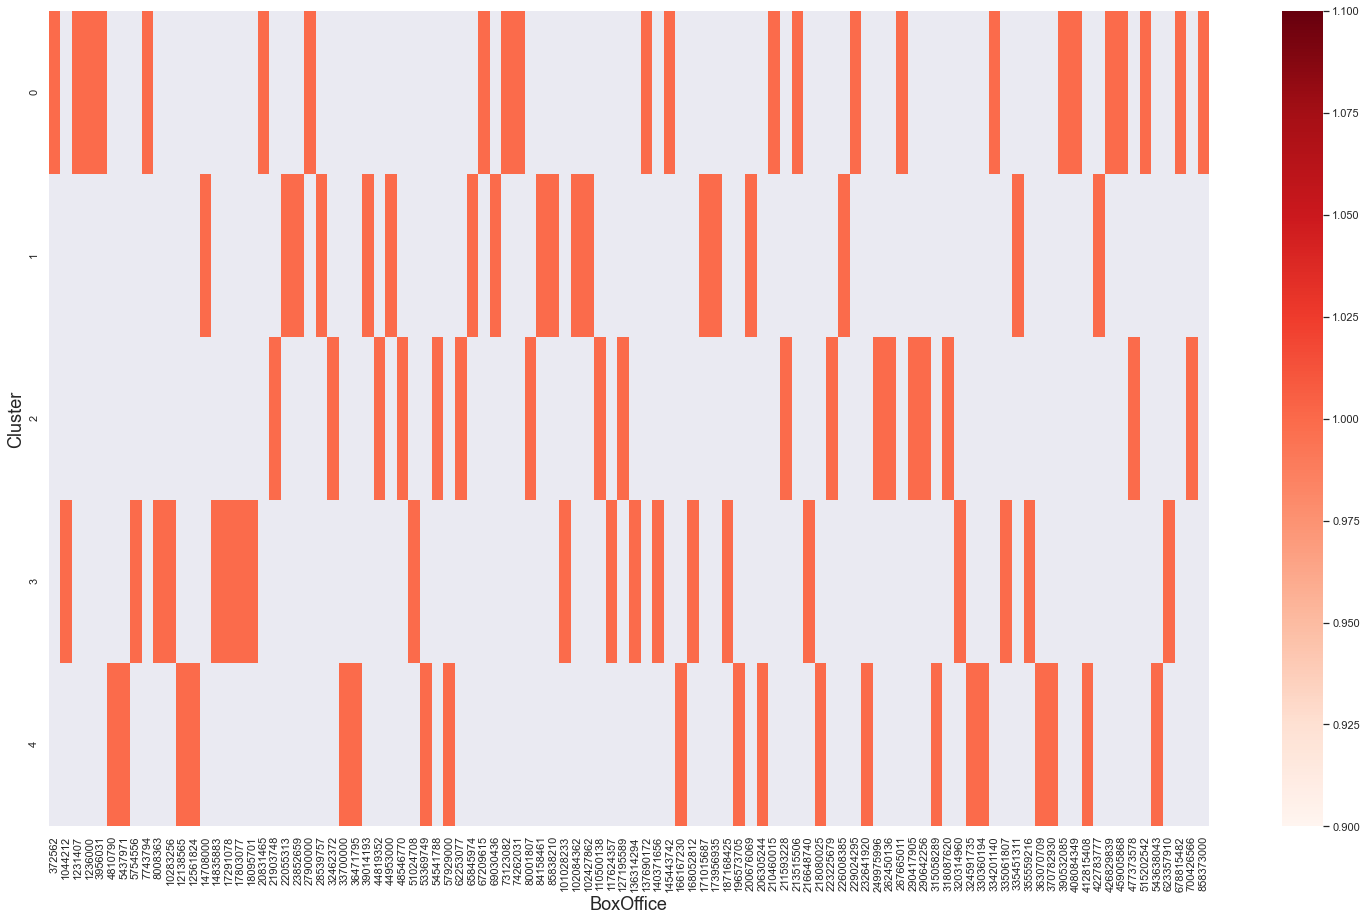

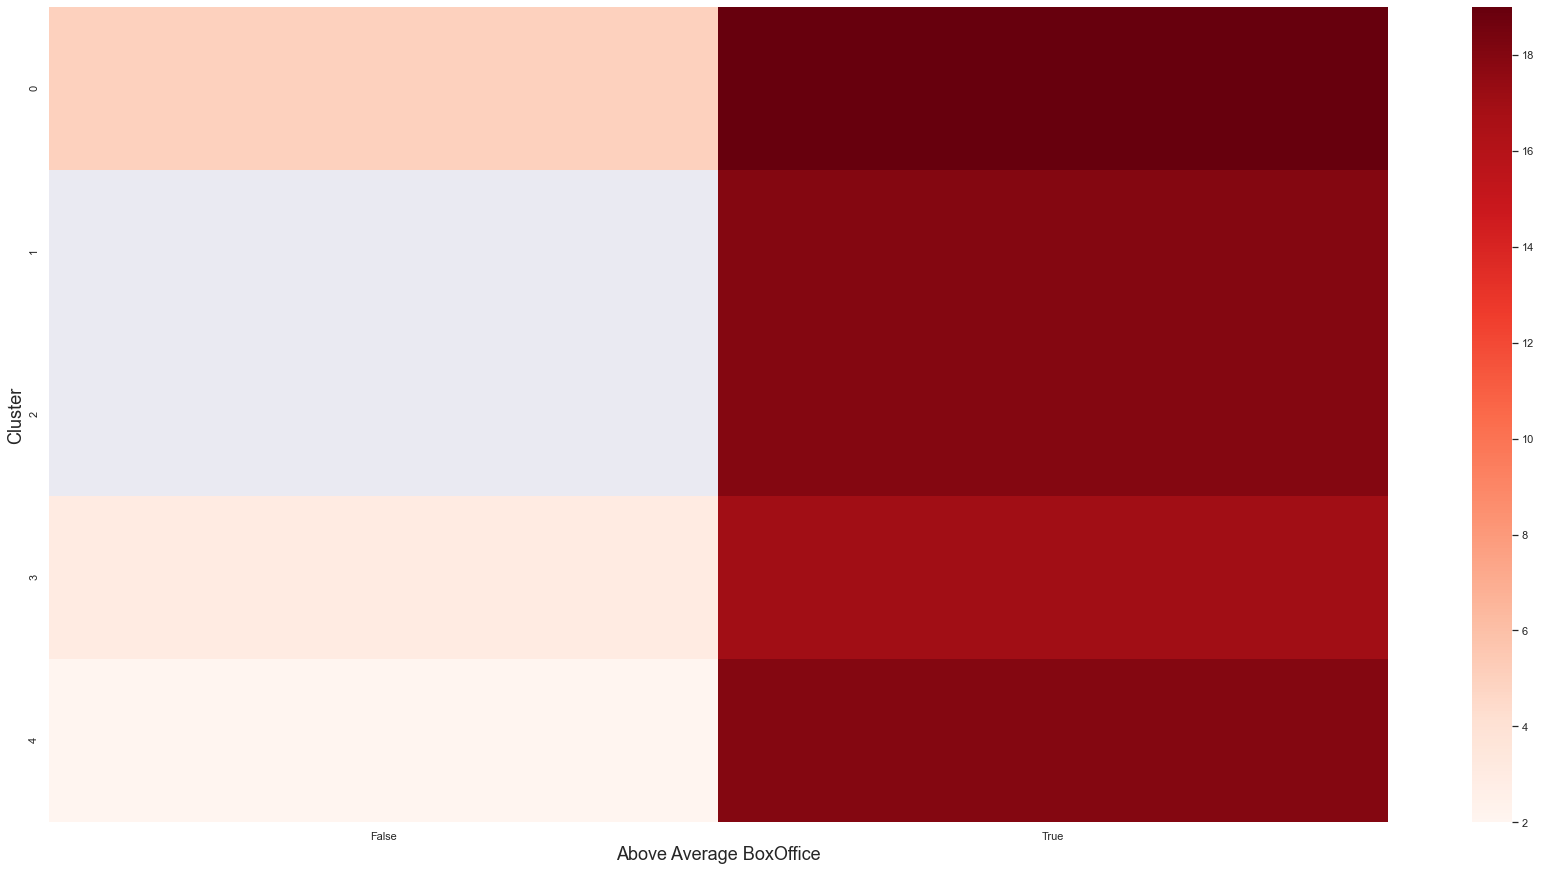

In [99]:
#add new column
df_test['BoxOffice'] = df_test['BoxOffice'].astype(int)
avg_pop=sum(df_test["BoxOffice"].values)/len(df_test["BoxOffice"].values)
avg_pop
df_test["above_avg"]=(df_test["BoxOffice"]-avg_pop>0)

#add the cluster label to the data frame
df_test['Cluster'] = kmeans.labels_
clusters = df_test.groupby(['Cluster', 'BoxOffice']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
sb.heatmap(clusters.unstack(level = 'BoxOffice'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('BoxOffice').set_size(18)
ax1.set_ylabel('Cluster').set_size(18)

clusters = df_test.groupby(['Cluster', 'above_avg']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters.unstack(level = 'above_avg'), ax = ax2, cmap="Reds")
ax2.set_xlabel('Above Average BoxOffice').set_size(18)
ax2.set_ylabel('Cluster').set_size(18)


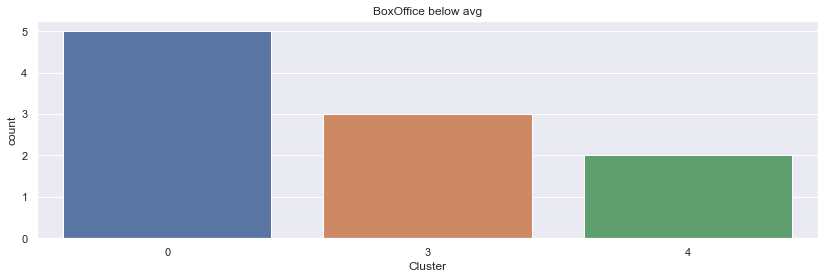

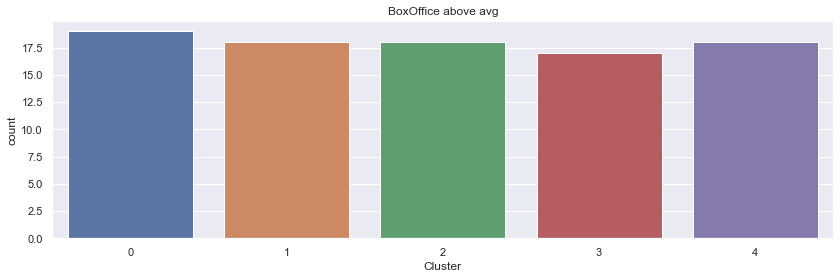

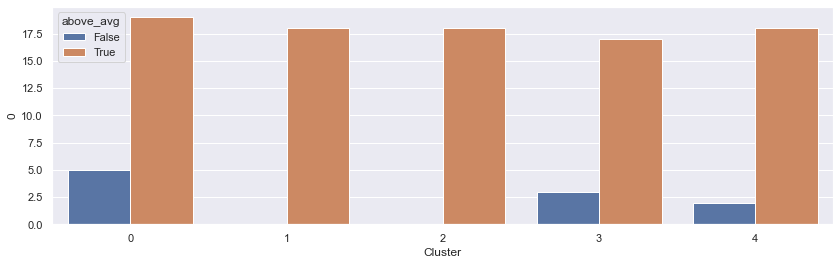

In [100]:
#create dataframe of reviews not above average
not_above = df_test.loc[df_test['above_avg'] == 0]
not_above.describe()
#create data frame of reviews above average
above_avg = df_test.loc[df_test['above_avg'] == 1]
above_avg.describe()


#plot the counts
plt.figure(figsize=(14,4))
sb.countplot(x='Cluster', data=not_above).set_title("BoxOffice below avg")
plt.show()
plt.figure(figsize=(14,4))
sb.countplot(x='Cluster', data=above_avg).set_title("BoxOffice above avg")
plt.show()

#create new variable as dataframe
cluster_test=pd.DataFrame(clusters)
cluster_test.reset_index(inplace=True)
cluster_test.columns

#ratio of true and false above_avg for each cluster
plt.figure(figsize=(14,4))
sb.barplot(x="Cluster", y=0, hue="above_avg", data=cluster_test)
plt.show()

Cluster 1: 100%
Cluster 2: 100%

In [101]:
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : aveng, follow, battl, power, becom, earth, event, univers, peter, caus
1 : young, forc, crime, past, escap, hit, join, woman, assassin, face
2 : harri, learn, year, turn, black, hogwart, find, ancient, new, live
3 : danger, time, team, make, island, race, research, frieza, adult, explor
4 : life, take, get, world, new, deadpool, evil, power, forc, train


In [102]:
#curious to see what movies comprises cluster 1 and 3
ls1=[]
ls2=[]
df_test1=df_test.reset_index(drop=True)
# iterating the columns
for row in df_test1.index:
    if df_test1['Cluster'][row]==4:
        ls1.append(row)
    elif df_test1['Cluster'][row]==2:
        ls2.append(row)

consolidate_df1=pd.DataFrame()
for i in ls1:
    temp_df=pd.DataFrame(df_test1.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df1=pd.concat([consolidate_df1, temp_df])
consolidate_df2=pd.DataFrame()
for i in ls2:
    temp_df=pd.DataFrame(df_test1.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df2=pd.concat([consolidate_df2, temp_df])

consolidate_df1

,Unnamed: 0,title,Unnamed: 0.1,Original Language,Awarded,Main Genre,Unnamed: 0.1.1,adult,backdrop_path,belongs_to_collection,...,Website,Response,Season,Episode,seriesID,totalSeasons,BoxOffice,imdbVotes,Cluster,above_avg
3,3,Tom & Jerry,7,English,False,Animation,tt1361336,False,/fev8UFNFFYsD5q7AcYS8LyTzqwl.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,33700000,17138,4,True
9,9,Tenet,35,English,True,Action,tt6723592,False,/wzJRB4MKi3yK138bJyuL9nx47y6.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,57929000,311857,4,True
10,10,Bad Boys for Life,37,English,True,Action,tt1502397,False,/upUy2QhMZEmtypPW3PdieKLAHxh.jpg,"{'id': 14890, 'name': 'Bad Boys Collection', '...",...,NaN,True,NaN,NaN,NaN,NaN,206305244,133505,4,True
13,13,Bloodshot,45,English,True,Action,tt1634106,False,/zlqMASc3vEtdym2OvXgE7fC6onT.jpg,"{'id': 763760, 'name': 'Bloodshot Collection',...",...,NaN,True,NaN,NaN,NaN,NaN,12561824,62561,4,True
16,16,The SpongeBob Movie: Sponge on the Run,57,English,False,Animation,tt4823776,False,/wu1uilmhM4TdluKi2ytfz8gidHf.jpg,"{'id': 275402, 'name': 'SpongeBob Collection',...",...,NaN,True,NaN,NaN,NaN,NaN,4810790,11763,4,False
21,21,The Passion of the Christ,75,English,True,Drama,tt0335345,False,/pE3dLJJ55Y2eiO5s7wYe9J3qS63.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,370782930,216065,4,True
27,27,King Kong,87,English,True,Animation,tt0360717,False,/b9XoSklkXIDIOQh6otfs0l8YLCH.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,218080025,393856,4,True
42,42,The Rhythm Section,128,English,True,Horror,tt7134096,False,/xRKwiUHGnsZGxZaO6OIKqpzJjPa.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,5437971,13203,4,False
49,49,After,153,English,True,Action,tt4126476,False,/997ToEZvF2Obp9zNZbY5ELVnmrW.jpg,"{'id': 702624, 'name': 'After Collection', 'po...",...,NaN,True,NaN,NaN,NaN,NaN,12138565,40588,4,True
52,52,The Gentlemen,158,English,False,Comedy,tt8367814,False,/tintsaQ0WLzZsTMkTiqtMB3rfc8.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,36471795,249440,4,True


In [103]:
consolidate_df2

,Unnamed: 0,title,Unnamed: 0.1,Original Language,Awarded,Main Genre,Unnamed: 0.1.1,adult,backdrop_path,belongs_to_collection,...,Website,Response,Season,Episode,seriesID,totalSeasons,BoxOffice,imdbVotes,Cluster,above_avg
5,5,Godzilla: King of the Monsters,16,English,True,Action,tt3741700,False,/jb6Ju38HmKX0bYHCmAxs8HyNeJ2.jpg,"{'id': 535313, 'name': 'Godzilla Collection', ...",...,NaN,True,NaN,NaN,NaN,NaN,110500138,141302,2,True
6,6,The Croods: A New Age,19,English,False,Animation,tt2850386,False,/cjaOSjsjV6cl3uXdJqimktT880L.jpg,"{'id': 464577, 'name': 'The Croods Collection'...",...,NaN,True,NaN,NaN,NaN,NaN,54541788,20408,2,True
26,26,Terminator: Dark Fate,84,English,True,Action,tt6450804,False,/a6cDxdwaQIFjSkXf7uskg78ZyTq.jpg,"{'id': 528, 'name': 'The Terminator Collection...",...,NaN,True,NaN,NaN,NaN,NaN,62253077,152462,2,True
33,33,Gemini Man,110,English,True,Drama,tt1025100,False,/c3F4P2oauA7IQmy4hM0OmRt2W7d.jpg,NaN,...,NaN,True,NaN,NaN,NaN,NaN,48546770,89785,2,True
39,39,Rambo: Last Blood,122,English,True,Animation,tt1206885,False,/spYx9XQFODuqEVoPpvaJI1ksAVt.jpg,"{'id': 5039, 'name': 'Rambo Collection', 'post...",...,NaN,True,NaN,NaN,NaN,NaN,44819352,84086,2,True
47,47,Frozen II,149,English,True,Family,tt4520988,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,"{'id': 386382, 'name': 'Frozen Collection', 'p...",...,NaN,True,NaN,NaN,NaN,NaN,477373578,140131,2,True
48,48,Black Panther,152,English,True,Action,tt1825683,False,/AlFqBwJnokrp9zWTXOUv7uhkaeq.jpg,"{'id': 529892, 'name': 'Black Panther Collecti...",...,NaN,True,NaN,NaN,NaN,NaN,700426566,633689,2,True
56,56,Harry Potter and the Philosopher's Stone,169,English,True,Action,tt0241527,False,/hziiv14OpD73u9gAak4XDDfBKa2.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",...,NaN,True,NaN,NaN,NaN,NaN,318087620,664959,2,True
58,58,It Chapter Two,174,English,True,Drama,tt7349950,False,/8moTOzunF7p40oR5XhlDvJckOSW.jpg,"{'id': 477962, 'name': 'It Collection', 'poste...",...,NaN,True,NaN,NaN,NaN,NaN,211593228,210586,2,True
70,70,Paranormal Activity: The Marked Ones,202,English,False,Action,tt2473682,False,/eAISoFMi29BVBKH1VRpne4mJ26K.jpg,"{'id': 41437, 'name': 'Paranormal Activity Col...",...,NaN,True,NaN,NaN,NaN,NaN,32462372,40155,2,True


analysising the overview gives us an understanding of what movies are in each of the clusters and could give us some indication of words that might enable the movie to be more successful.

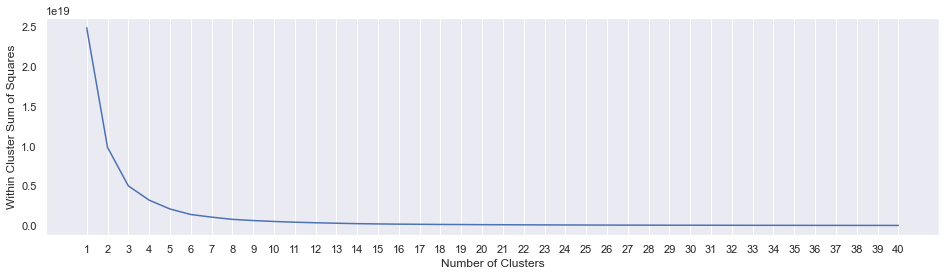

In [104]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

df2=movieData.reset_index(drop=True)

# Extract the Features from the Data
X = pd.DataFrame(df2[["Awarded", "BoxOffice"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Features 	Awards 	BoxOffice

Cluster_2 0:	0.59	16373608.9	
Cluster_2 1:	0.98	156878270.66	
Cluster_2 2:	0.99	322322195.8	
Cluster_2 3:	0.81	68780733.59	
Cluster_2 4:	1.0	620401490.94	

Within Cluster Sum of Squares : 2.0957416768675136e+18



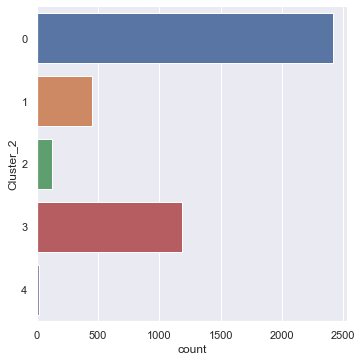

In [105]:
# Set "optimal" Number of Clusters
num_clust = 5

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tAwards", "\tBoxOffice")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster_2", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster_2"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster_2", data = X_labeled, kind = "count")

In [106]:
# Display number of films per cluster (clusters from 0 to 4)
X_labeled['Cluster_2'].value_counts()

0    2415
3    1185
1     449
2     120
4      18
Name: Cluster_2, dtype: int64

<AxesSubplot:xlabel='Awarded', ylabel='BoxOffice'>

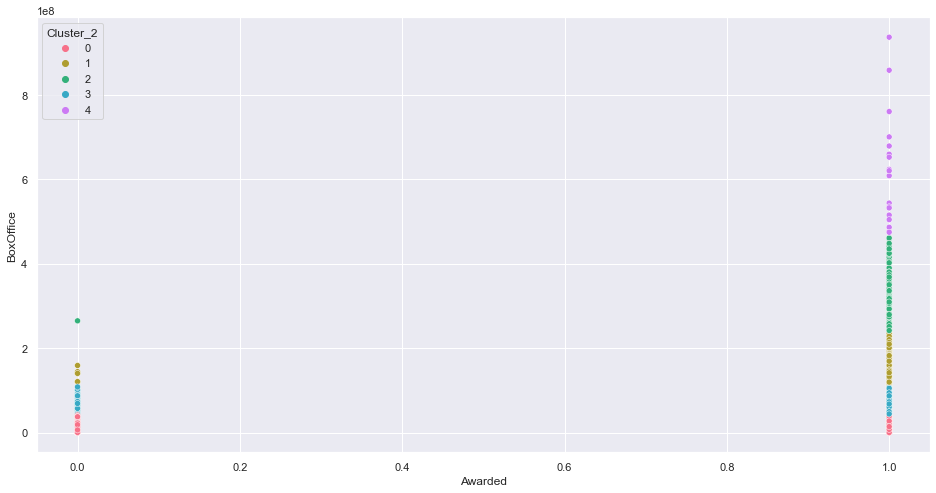

In [107]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
sb.scatterplot(data=X_labeled, x="Awarded", y="BoxOffice",hue = "Cluster_2",palette="husl")

In [108]:
ls1=[]
ls4=[]
ls0=[]
ls2=[]
ls3=[]

# iterating the columns
for row in X_labeled.index:
    if X_labeled['Cluster_2'][row]==1:
        ls1.append(row)
    elif X_labeled['Cluster_2'][row]==4:
        ls4.append(row)
    elif X_labeled['Cluster_2'][row]==0:
        ls0.append(row)
    elif X_labeled['Cluster_2'][row]==2:
        ls2.append(row)
    elif X_labeled['Cluster_2'][row]==3:
        ls3.append(row)

consolidate_df1=pd.DataFrame()
for i in ls1:
    temp_df=pd.DataFrame(df2.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df1=pd.concat([consolidate_df1, temp_df])
consolidate_df4=pd.DataFrame()
for i in ls4:
    temp_df=pd.DataFrame(df2.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df4=pd.concat([consolidate_df4, temp_df])
consolidate_df4

consolidate_df0=pd.DataFrame()
for i in ls0:
    temp_df=pd.DataFrame(df2.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df0=pd.concat([consolidate_df0, temp_df])
consolidate_df2=pd.DataFrame()
for i in ls2:
    temp_df=pd.DataFrame(df2.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df2=pd.concat([consolidate_df2, temp_df])
consolidate_df3=pd.DataFrame()
for i in ls3:
    temp_df=pd.DataFrame(df2.iloc[i])
    temp_df=temp_df.T
    temp_df
    consolidate_df3=pd.concat([consolidate_df3, temp_df])

In [109]:
#CONSOLIDATE 0
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in consolidate_df0['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 1, n_init = 17, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(0) + ' : ' + ', '.join(words[word] for word in centroid))

#CONSOLIDATE 1
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in consolidate_df1['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 1, n_init = 17, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(1) + ' : ' + ', '.join(words[word] for word in centroid))
    

#CONSOLIDATE 2
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in consolidate_df2['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 1, n_init = 17, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(2) + ' : ' + ', '.join(words[word] for word in centroid))


#CONSOLIDATE 3
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in consolidate_df3['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 1, n_init = 17,  tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(3) + ' : ' + ', '.join(words[word] for word in centroid))


#CONSOLIDATE 4
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform([str(x) for x in consolidate_df4['overview']])
#returns a list of words.
words = tfv.get_feature_names()

#setup kmeans clustering
kmeans = KMeans(n_clusters = 1, n_init = 17, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(4) + ' : ' + ', '.join(words[word] for word in centroid))

0 : life, young, new, one, world, family, man, two, must, woman
1 : world, new, must, life, family, find, young, team, one, back
2 : world, life, new, harry, man, must, help, peter, evil, named
3 : life, one, world, new, family, young, man, two, find, must
4 : order, new, resistance, avengers, battle, meanwhile, young, first, learn, world


The words here seem to have alot of overlap, but this is because we need to segment the data according to the clusters formed in order to perform our vectorizer transformation, hence there was no comparison of words between clusters, which produced these duplicate words. But we can ignore these words and focus on the ones that are unique to the cluster.

### Conclusion
 Both ventures gave similar results (words from clusters of successful movies)
'hit’, ‘escape’, ‘assasin’, ‘face’ indicates some form of Action scenes within the successful clusters
 Words from ventures indicate that Superpowers or Fantasy are common features of top movies
The top words of successful clusters indicate that they contain a franchise and tend to have the element of actions or crime as a common theme in the clusters.


### Recommendation:
 Incorporate Action and Crime themes and elements into movies to fall into same successful cluster


### Interesting add-ons
#### Which actors are most present in the top 100 movies?

In [40]:
#checking top actors in top 100 movies to date
ls=[]
for i in range(df_test.shape[0]):
    for j in range(len(df_test['Actors'][i].split(','))):
        ls.append(df_test['Actors'][i].split(',')[j])
from collections import Counter
actor_count = pd.DataFrame.from_dict(Counter(ls), orient='index').reset_index()
actor_count.describe()

,0
count,347.000000
mean,1.152738
std,0.477545
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


The highest number of appearance is 4

In [44]:
actor_count.loc[actor_count[0] == 4]

,index,0
69,Robert Downey Jr.,4
70,Chris Hemsworth,4
71,Mark Ruffalo,4
72,Chris Evans,4
